In [120]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx
import pickle

In [122]:
with open('output/nodes.pickle', 'rb') as f:
    nodes_list = pickle.load(f)

with open('output/edges.pickle', 'rb') as f:
    edges_list = pickle.load(f)

print('nodes:', len(nodes_list), ', edges (doubled):', len(edges_list))

nodes: 1060 , edges (doubled): 49760


In [123]:
G = nx.Graph(name='DDNet_Teamranks')
G.add_nodes_from(nodes_list)
G.add_weighted_edges_from(edges_list)
print(G.number_of_edges(), G.number_of_nodes(), G.name)


24880 1060 DDNet_Teamranks


In [124]:
wts = [x[1]['weight'] for x in G.nodes.data()]
n_labels = nx.get_node_attributes(G, 'labels')
n = G.number_of_nodes()

k_custom = 3 / (n ** 0.5)
n_size = [(1500 * x) for x in wts]

D:\PycharmProjects\DDNet_Social_graph\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PycharmProjects\DDNet_Social_graph\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PycharmProjects\DDNet_Social_graph\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\PycharmProjects\DDNet_Social_graph\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\PycharmProjects\DDNet_Social_graph\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PycharmProjects\DDNet_Social_graph\venv\lib\si

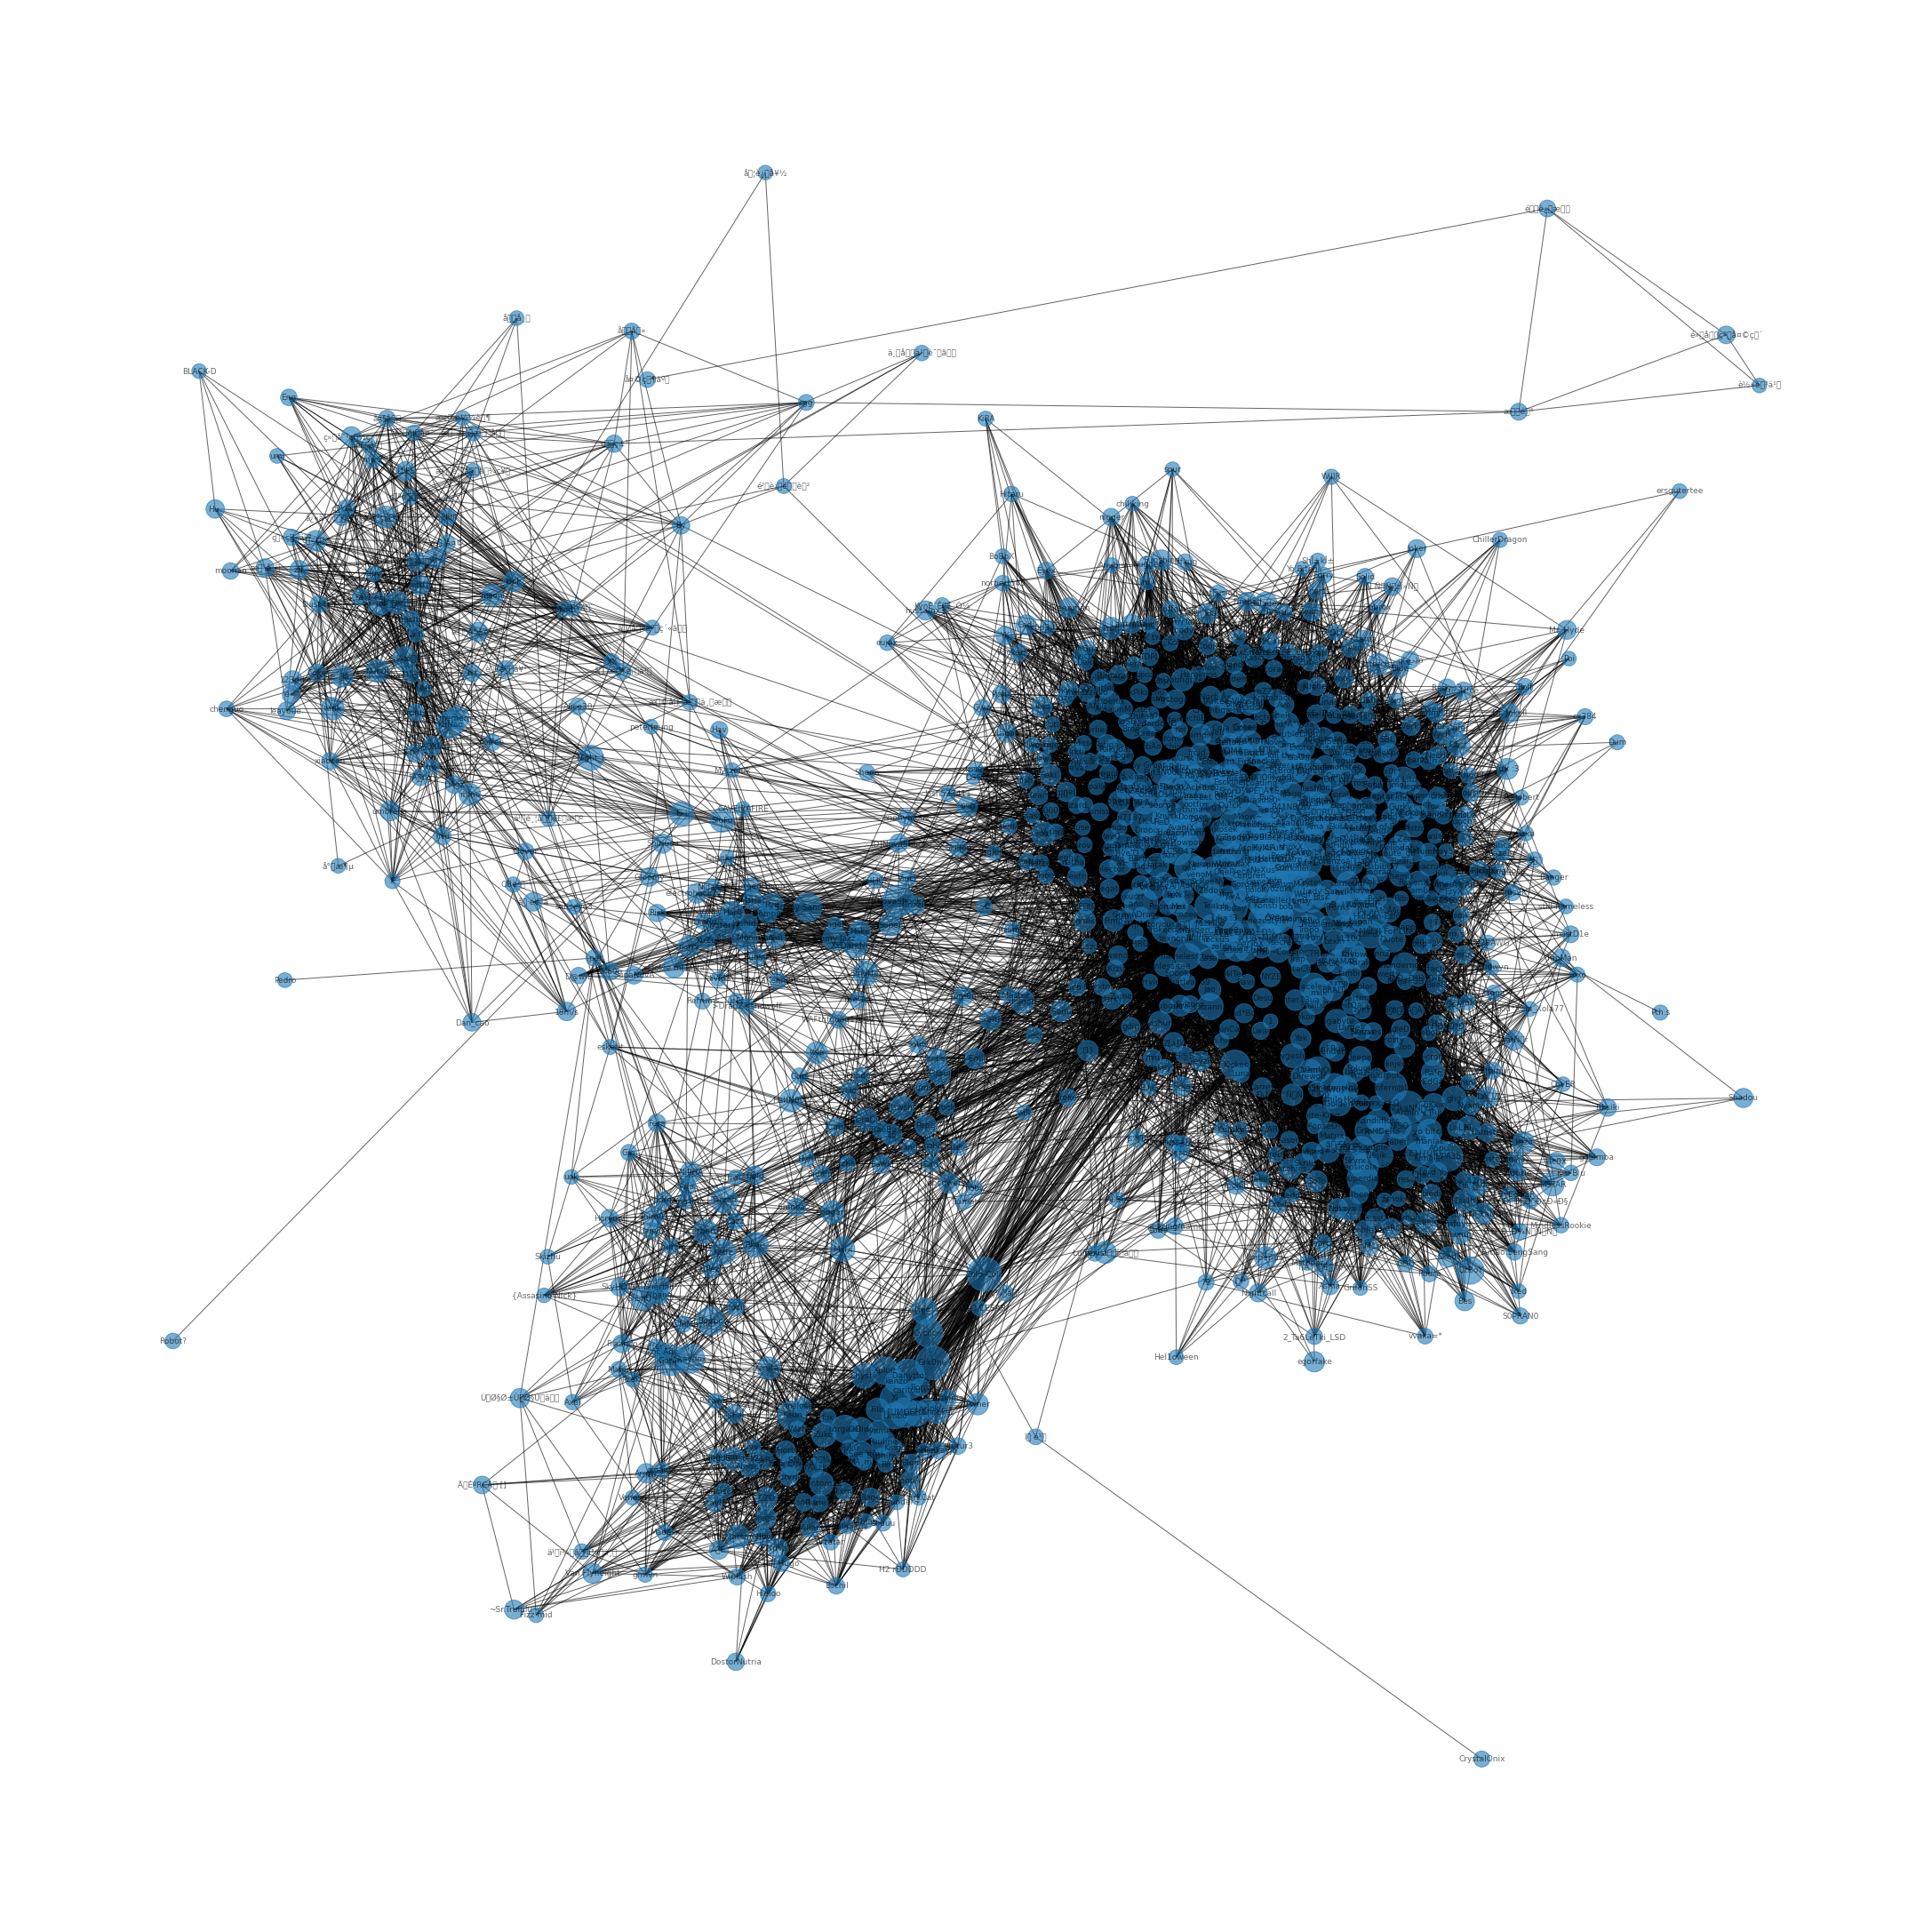

In [125]:
plt.figure(figsize = (30, 30))
nx.draw(G, pos=nx.drawing.layout.spring_layout(G, k=k_custom),
        node_size=n_size, labels=n_labels, font_size=9, alpha=0.6,
        with_labels=True)
plt.savefig('G.png')

__________

In [126]:
with open('output/nodes_short.pickle', 'rb') as f:
    nodes_list_short = pickle.load(f)
with open('output/edges_short.pickle', 'rb') as f:
    edges_list_short = pickle.load(f)

print('nodes:', len(nodes_list_short), ', edges (x2):', len(edges_list_short))

nodes: 296 , edges (x2): 10728


In [127]:
g = nx.Graph(name='DDNet_Teamranks_short')
g.add_nodes_from(nodes_list_short)
g.add_weighted_edges_from(edges_list_short)
print(g.number_of_edges(), g.number_of_nodes(), g.name)

5364 296 DDNet_Teamranks_short


In [152]:
wts = [x[1]['weight'] for x in g.nodes.data()]
n_labels = nx.get_node_attributes(g, 'labels')
n = g.number_of_nodes()

k_custom = 3 / (n ** 0.5)
n_size = [(2000 * x) for x in wts]

edge_w = [5 * x[2]['weight'] for x in g.edges.data()]

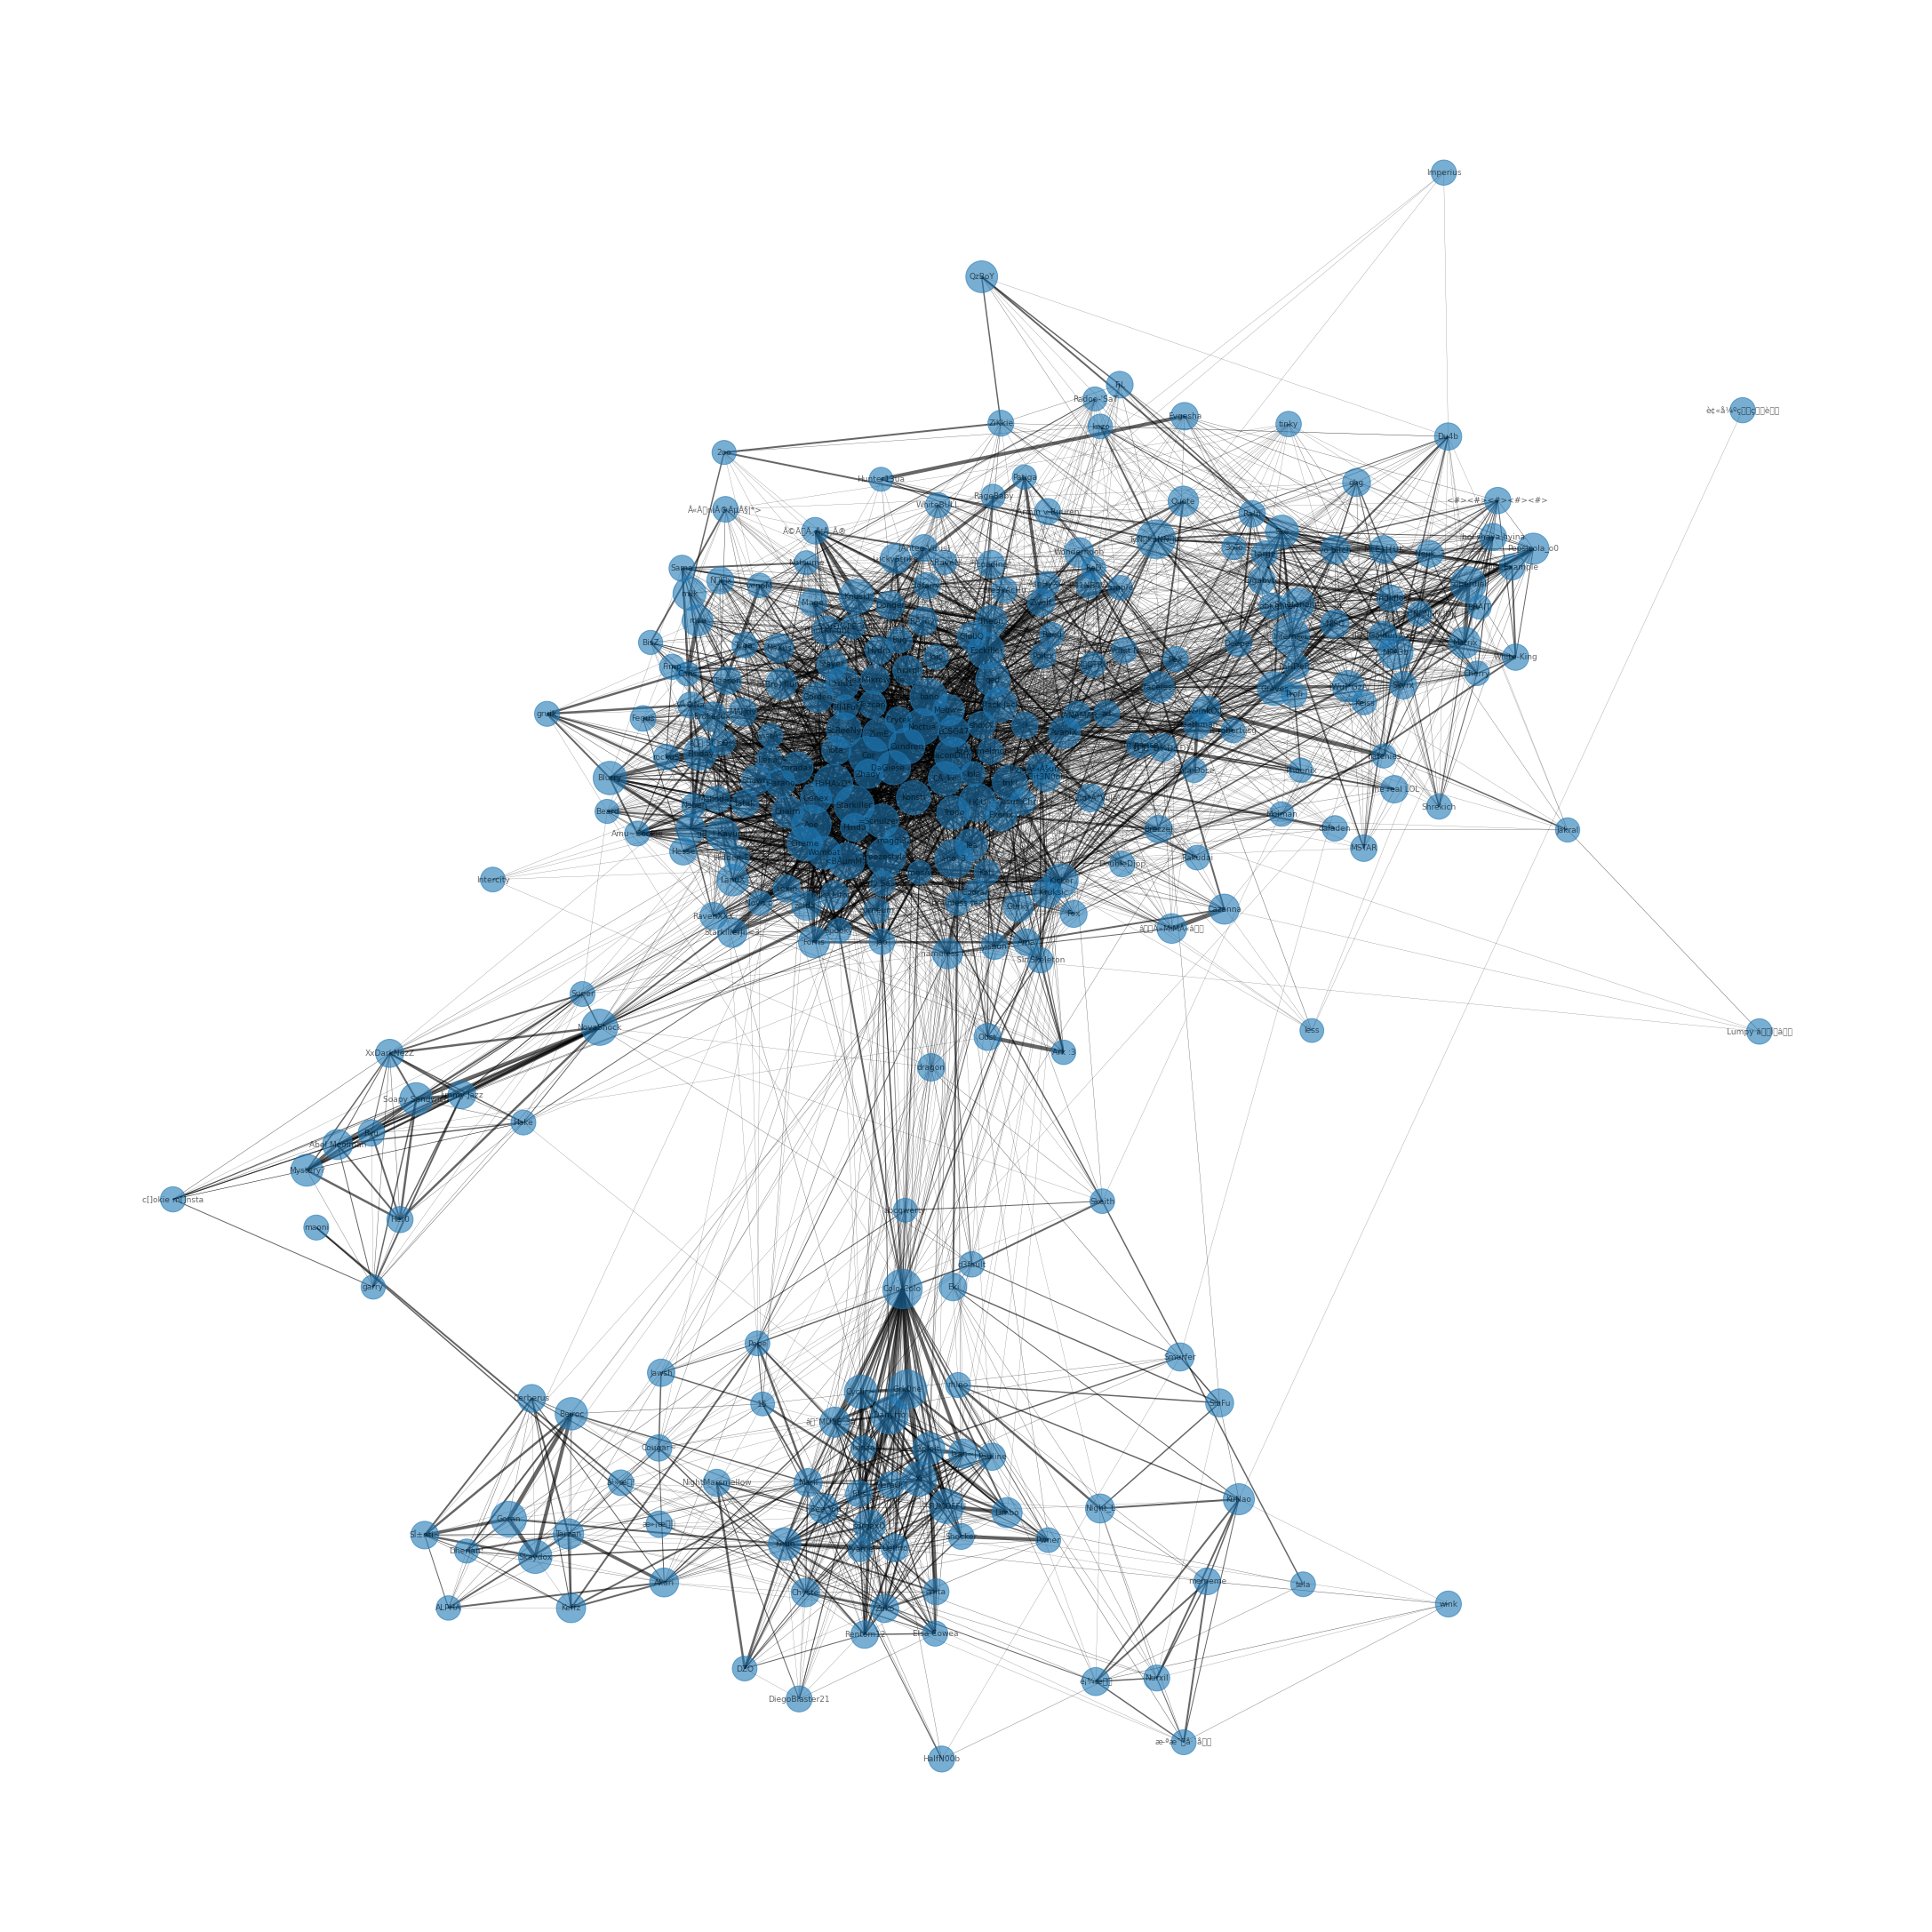

In [153]:
plt.figure(figsize = (30, 30))
nx.draw(g, pos=nx.drawing.layout.spring_layout(g, k=k_custom, weight='weight'),
        node_size=n_size, labels=n_labels, font_size=9, alpha=0.6,
        width=edge_w, with_labels=True)
plt.savefig('g_small.png')

График распределения степеней вершин

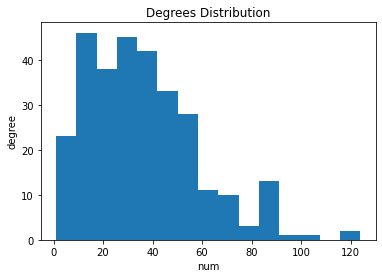

In [154]:
deg = [x[1] for x in list(nx.degree(g))]

plt.title("Degrees Distribution")
plt.xlabel('num')
plt.ylabel('degree')
plt.hist(deg, bins=15)
plt.savefig('deg.png')